In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
#Read xlsx files into DF
startups = pd.read_excel('/content/P11-1000-Startups.xlsx')
Financials = pd.read_excel('/content/P11-1000-Startups.xlsx', sheet_name= 'Financials')

In [7]:
#Joining Dataframes into one DF
data = startups.join(Financials, on = 'ID', how = 'left', rsuffix = '_F')

In [8]:
data.drop(columns = ['ID_F','Name_F'], inplace = True)

In [9]:
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [10]:
data.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,5448571.0,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,2007778.0,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,1857830.0,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01


In [11]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0


In [12]:
Financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [13]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [14]:
industries = pd.DataFrame(industries)

In [15]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [16]:
industries

,Number
Industry,
IT Services,147
Health,88
Software,87
Business Products & Services,67
Advertising & Marketing,65
Financial Services,54
Government Services,50
Construction,49
Retail,48


Let's find the earliest founded startups each industry

In [17]:
earliest_startups = pd.DataFrame(columns = startups.columns.to_list())

In [18]:
earliest_startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees


In [19]:
industry_grup = startups.groupby('Industry')

In [20]:
# Find the earliest founded startup in each industry
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  earliest_startups = earliest_startups.append(the_min_year)

In [21]:
# Optional export data to xlsx file
earliest_startups.to_excel('earliest_startups.xlsx')

In [22]:
earliest_startups.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago,55.0
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT",95.0
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis,49.0


Let's check which industry hire the highest number of employees

In [23]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum]})

In [24]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [25]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [26]:
indus.reset_index(inplace = True)

In [27]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [28]:
indus

,Industry,Employees_Mean,Employees_Sum
0,Advertising & Marketing,55.0,3550
1,Business Products & Services,95.0,6367
2,Computer Hardware,49.0,196
3,Construction,58.0,2839
4,Consumer Products & Services,132.0,5928
5,Education,57.0,963
6,Energy,331.0,7273
7,Engineering,117.0,1983
8,Environmental Services,78.0,702
9,Financial Services,207.0,11191


Text(Health, 18000, 'Highest point - Health industry')

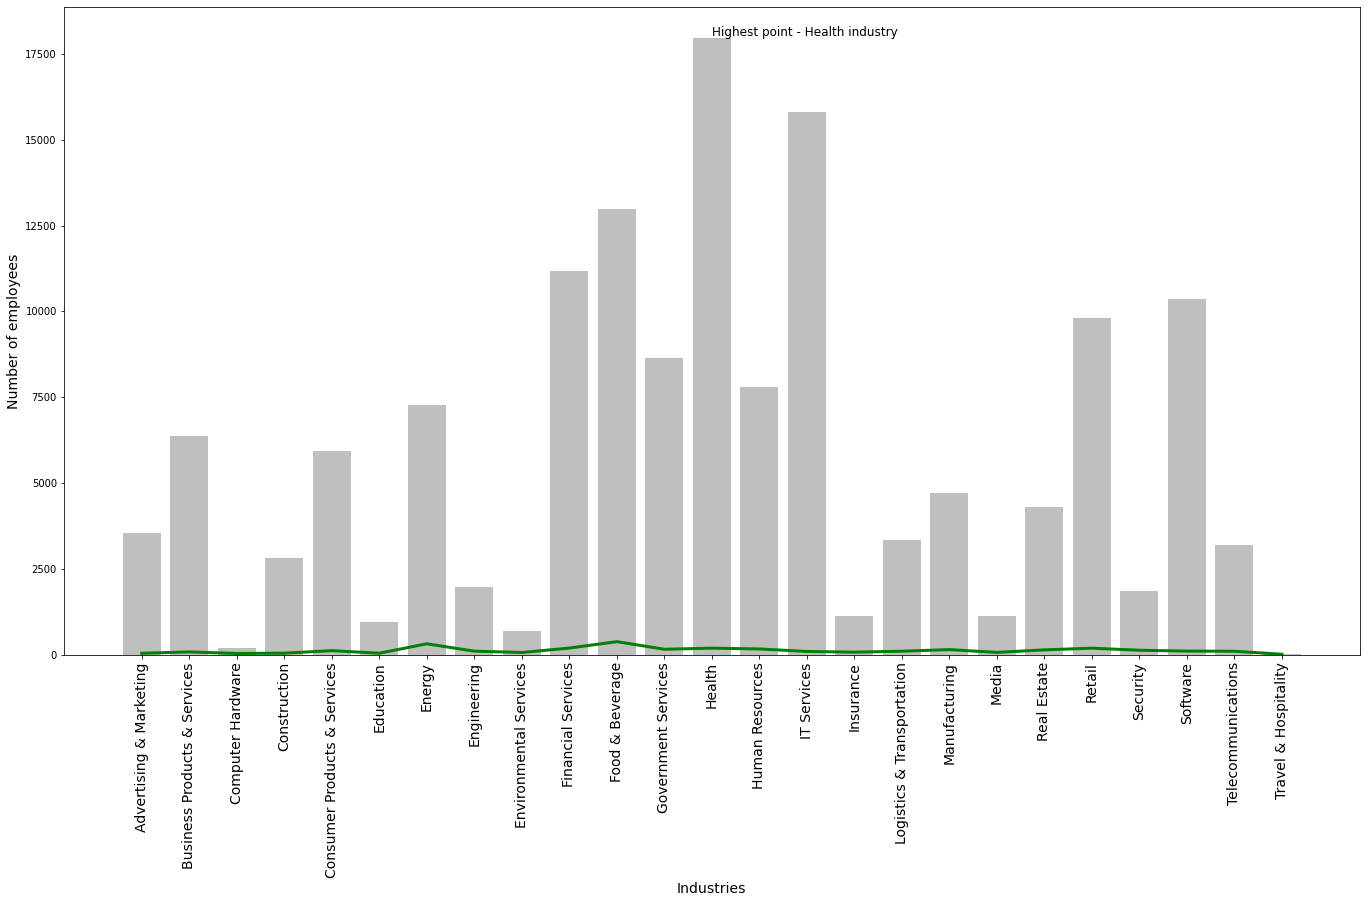

In [29]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1 = indus['Industry']
x2 = indus['Employees_Mean']
x3 = indus['Employees_Sum']
plt.xticks(rotation=90, size = 14) 
plt.ylabel('Number of employees', size = 14)
plt.xlabel('Industries', size = 14)
ax.plot(x1,x2, color = 'g', linewidth=3.0)
ax.bar(x1,x3, color = 'grey', alpha = 0.5)
ax.annotate('Highest point - Health industry', xy = ('Health', 18000), size = 12, color = 'black')

#plt.savefig('Chart_basic.png', dpi = 300)

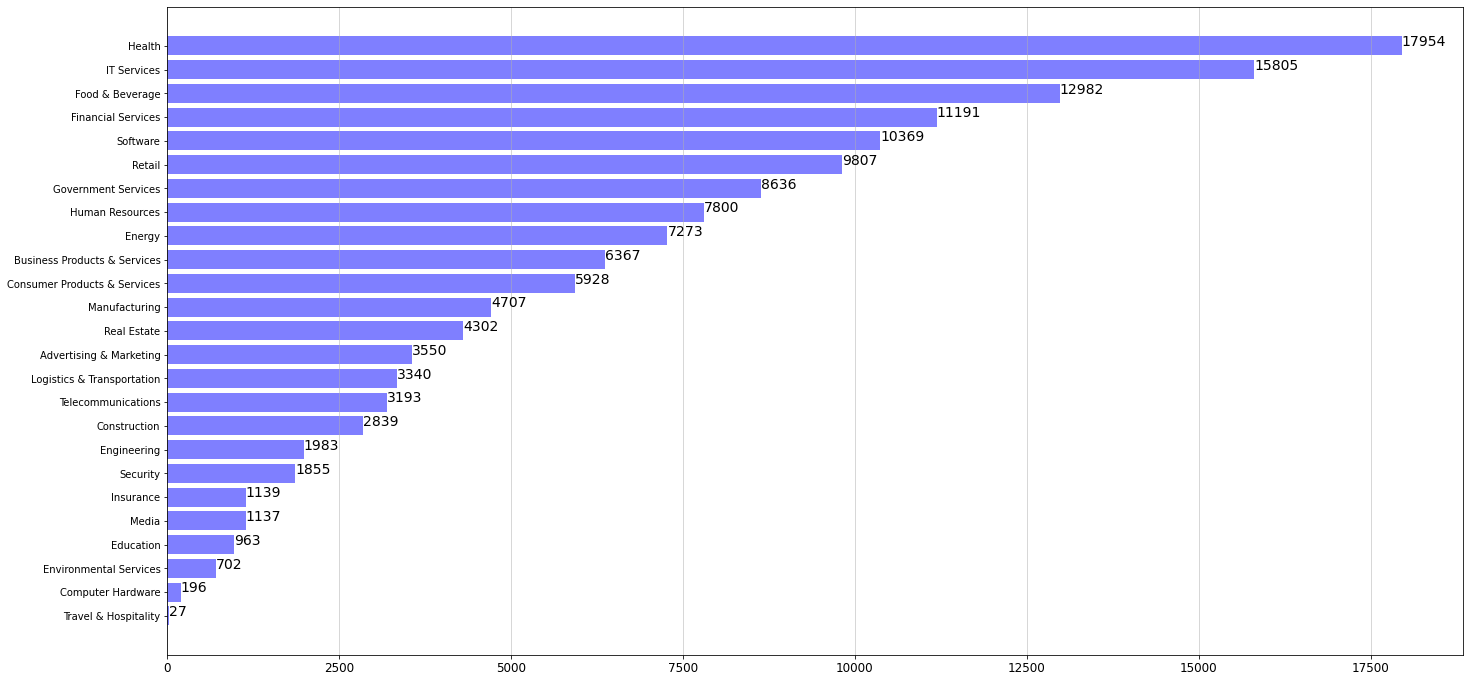

In [30]:
#Number of employess in each industry

fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
indus.sort_values(by = 'Employees_Sum', ascending=True, inplace = True)

x1 = indus['Industry']
x2 = indus['Employees_Sum']

for Index, Sum in enumerate(indus['Employees_Sum']):
    ax.annotate(Sum, xy = (Sum,Index), size = 14)

plt.barh(x1,x2, color = 'blue', alpha = 0.5)
ax.xaxis.grid(linestyle = '-', linewidth = 0.5)
plt.xticks(size = 12)
plt.show()




In [31]:
#indus.sort_values(by = 'Employees_Sum', ascending=False)

In [32]:
#Columns with 2015 data
#filter_col = [col for col in data if col.startswith('2015')]

Exploratory Data Analysis - Financial Data (2015)


In [33]:
#Base informations
Financials_2015 = data.iloc[0:,:13]

In [34]:
Financials_2015.isnull().sum()

ID                0
Name              0
Industry          0
Description       1
Year Founded      0
Employees         0
State             0
City              0
Metro Area       11
2015 Revenue      1
2015 Expenses     1
2015 Profit       1
2015 Growth %     1
dtype: int64

In [35]:
#The higest revenue in each industry

In [36]:
best_revenue_2015 = pd.DataFrame(columns = Financials_2015.columns)

In [37]:
financial_industry = Financials_2015.groupby('Industry')

In [38]:
for revenue, industry in financial_industry:
  higest_revenue = industry.nlargest(n=1, columns = '2015 Revenue')
  best_revenue_2015 = best_revenue_2015.append(higest_revenue)

In [39]:
best_revenue_2015['Avg_2015_Revenue'] = best_revenue_2015['2015 Revenue'].mean()

In [40]:
best_revenue_2015['2015 Revenue'] - best_revenue_2015['Avg_2015_Revenue']

917    2821754.534
636     570327.474
56    -2478288.806
123    -160010.746
281    -771933.286
324     989604.324
615     823170.404
80     -620097.046
171   -2286528.506
79     -359616.236
230    1973665.824
511    3531044.084
612     601369.094
979     691062.394
28      598415.834
160    -395711.146
13     -220849.686
922   -1031389.066
216     366807.434
744   -1464032.166
527    -376851.146
972   -1027710.986
931    2033294.794
319     -39725.276
982   -3767772.096
dtype: float64

In [41]:
Financials_2015['Revenue_per_Emp'] = Financials_2015.groupby('Industry').apply(lambda x: x['2015 Revenue']/x['Employees']).reset_index(level = 0, drop = True).round(2)

In [42]:
Financials_2015['Revenue_per_Emp'] = Financials_2015['Revenue_per_Emp'].fillna(0)

In [43]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


In [44]:
aggre = Financials_2015.groupby('State').agg({'2015 Revenue' : [np.mean, np.sum],'2015 Profit' : [np.mean, np. sum], '2015 Expenses' : [np.mean, np.sum]}).round(0)

In [45]:
aggre.columns = [x + y.capitalize() for x,y in aggre.columns.values]

In [46]:
aggre.reset_index(inplace = True)

In [47]:
aggre.columns

Index(['State', '2015 RevenueMean', '2015 RevenueSum', '2015 ProfitMean',
       '2015 ProfitSum', '2015 ExpensesMean', '2015 ExpensesSum'],
      dtype='object')

In [48]:
aggre.rename(columns = {'2015 ExpensesSum' : '2015_Expenses_Sum', '2015 ExpensesMean' : '2015_Expenses_Mean'}, inplace= True)

In [49]:
aggre.rename(columns = {'2015 RevenueMean' : '2015_Revenue_Mean',
                        '2015 RevenueSum' : '2015_Revenue_Sum',
                        '2015 ProfitMean' : '2015_Profit_Mean',
                        '2015 ProfitSum' : '2015_Profit_Sum'
}
,inplace = True
)

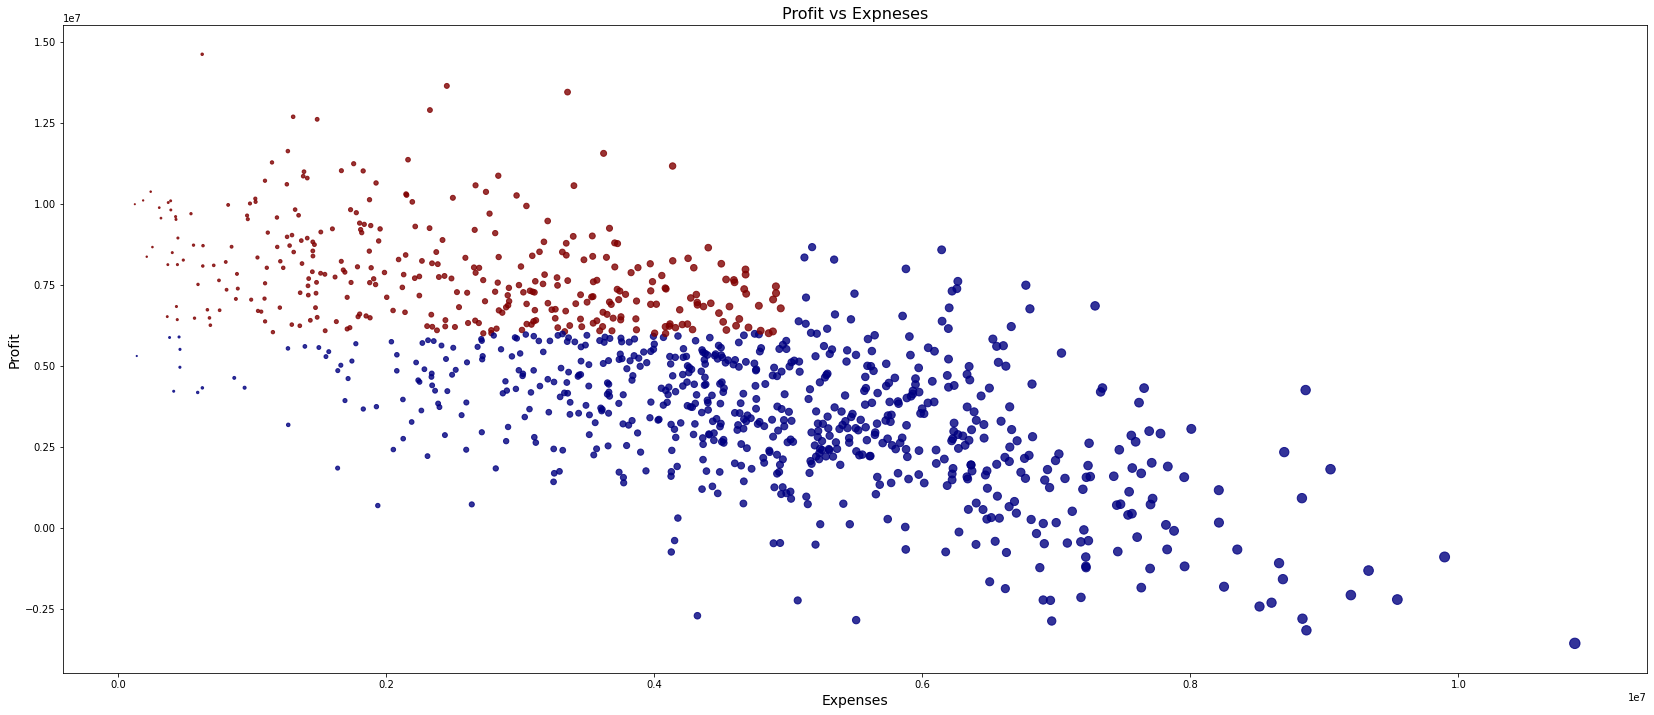

In [50]:
fig = plt.figure(figsize=(22,9))
ax = fig.add_axes([0,0,1,1])

#x1 = aggre['2015_Expenses_Sum'] 
#x2 = aggre['2015_Profit_Sum']

#mask1 = Financials_2015['2015 Profit'] > 60000
#mask2 = Financials_2015['2015 Expenses'] < 800000
#Financials_2015[mask1&mask2]


# x3 & x4 - Les't point out only startups with Prof. > 6 mln and Exp. < 5 mln

x1  = Financials_2015['2015 Expenses'] 
x2 = Financials_2015['2015 Profit']
x3 = Financials_2015['2015 Profit'] > 6000000
x4 = Financials_2015['2015 Expenses'] < 5000000


plt.title('Profit vs Expneses', size = 16)
plt.ylabel('Profit', size = 14)
plt.xlabel('Expenses', size = 14)


plt.scatter(x1, x2, s = x1/100000, c = [x3 & x4], alpha = 0.8, cmap='jet')


In [51]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


In [82]:
Financials_2015['Industry'].str[0:2]

0      So
1      IT
2      Re
3      Re
4      En
       ..
995    Co
996    Re
997    IT
998    Ed
999    IT
Name: Industry, Length: 1000, dtype: object

In [109]:
exceL_report = pd.pivot_table(
   data = Financials_2015,
   columns = ['State'],
   index = ['Year Founded'],
   values = ['2015 Revenue']

).fillna('--').round(0)

In [ ]:
aggsPivoted = pd.pivot_table(aggsMelt, # nazwa obiektu 
                             index=['Obszar Kadrowy', 'variable'], # zmienne wierszowe
                             columns=['Stanowisko', 'Płeć'],  # zmienne kolumnowe
                             values = ['variable']) # zmienne w wartosciach
aggsPivoted

In [125]:
excel_report.to_excel('excel_report.xlsx')

In [124]:
excel_report = pd.pivot_table(
    data = Financials_2015,
    index = ['State', 'City'],
    columns = ['Year Founded'],
    values = ['2015 Revenue'] ).fillna('-').round(0).reset_index()

In [113]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


In [140]:
d1 = pd.pivot_table(
    data = Financials_2015,
    index = ['Industry'],
    columns = ['State'],
    values = ['2015 Expenses'],
    aggfunc = np.mean
).round(0).fillna(0)

In [159]:
d1.reset_index(inplace = True)

In [170]:
Financials_2015.query('State == ["TX","AL"]')

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
7,8,Toughtam,Logistics & Transportation,"An asset-backed, third-party logistics company...",2011,20,AL,Birmingham,"Birmingham-Hoover, AL",6329643.96,1716656.77,4612987.19,3.23,316482.20
40,41,Ozerholdings,Energy,Specializes in asset integrity for the oil & g...,2012,278,TX,Pasadena,Houston,11205062.88,4368200.09,6836862.78,4.20,40305.98
42,43,Hotlane,Government Services,"Provides software development, engineering, pr...",2012,87,AL,Huntsville,"Huntsville, AL",7346281.01,3298689.94,4047591.06,7.08,84440.01
55,56,Tampware,Construction,A full-service architecture firm that speciali...,2011,13,TX,Houston,Houston,12159972.52,4909604.34,7250368.18,4.27,935382.50
72,73,Mediahex,IT Services,An enterprise consulting services provider spe...,2005,29,TX,Houston,Houston,7403632.88,667051.04,6736581.85,2.87,255297.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,Langedprivacy,Financial Services,A financial institution that leverages the pow...,2001,425,TX,Austin,Austin,9467050.59,3281019.20,6186031.39,5.59,22275.41
958,959,Excellencerecent,Health,A frontline healthcare provider that performs ...,2010,381,TX,Farmers Branch,Dallas,8998948.05,3222421.55,5776526.49,4.15,23619.29
978,979,Quickpolls,Software,An e-commerce platform that enables fast-growi...,2009,243,TX,Austin,Austin,6739498.59,3070113.59,3669385.01,5.16,27734.56
983,984,Suckedregister,Retail,A fashion accessories retailer with over 280 l...,2010,7125,TX,Houston,Houston,9078519.49,6994753.12,2083766.37,1.60,1274.18


In [ ]:
marr.loc[marr.favColor == "red", "favColor"] = "reddish"

In [192]:
Financials_2015.loc[Financials_2015.State == "TX","State"] = "test"

In [193]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,TX
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72,NaN
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82,NaN
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26,NaN
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45,NaN
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68,NaN
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,test,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30,NaN
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71,NaN
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60,NaN


In [195]:
Financials_2015.loc[Financials_2015.State == 'test','State'] = 'TX'

In [196]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,TX
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72,NaN
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82,NaN
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26,NaN
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45,NaN
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68,NaN
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30,NaN
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71,NaN
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60,NaN


In [197]:
Financials_2015.loc[Financials_2015.Industry == 'Retail','Industry'] = 'Test'

In [199]:
Financials_2015.loc[Financials_2015.Industry == 'Test','Industry'] = 'Retail'

In [198]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,TX
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72,NaN
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82,NaN
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26,NaN
3,4,Greenfax,Test,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45,NaN
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68,NaN
996,997,Overviewparrot,Test,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30,NaN
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71,NaN
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60,NaN
